<a href="https://colab.research.google.com/github/Gersson0410/Dataset_Ant_Team/blob/main/GPS___Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de Datos del Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls "/content/drive/MyDrive/Ant Team/Datasets"

anios
Anuario_Temperatura_Peru2000_2022.xlsx
Dataset_Centralizado.csv
datos_abiertos_vigilancia_iras_2000_2023.csv
minAnual_1995_2022.csv
min.gsheet
OEFA_EAS_Aire_1970_2023.csv
OEFA_segmented
Temperaturas_peru_limpio.csv
Trama_esquema_regular_vacunacion2020_2025.csv
vacunacion_IRAS_Clean.csv


# 1.Tratamiento de los Datasets


## 1.1 Temperaturas

aqui se hizo el tratamiento del dataset por temperaturas anuales
para obtneer el csv de temperatura mas baja anual



*   Tecnica Utilizada : Interpolacion Lineal Pandas
*   Missing Data Imputation



✅ Dataset cargado correctamente.

Columnas detectadas: ['Departamento', '1995', '1996', '1997', '1998', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

Primeras filas del dataset original:
  Departamento  1995  1996  1997  1998  2000  2001  2002  2003  2004  ...  \
0     Amazonas  10.8  10.5  10.2   9.2   9.0  10.4  11.9  11.6  10.4  ...   
1       Áncash   4.3   4.3   4.4   4.9   3.6   4.3   5.1   5.9   4.6  ...   
2     Apurímac   NaN  10.0  10.1  10.8   9.9  10.1  10.3  11.5  10.2  ...   
3     Arequipa   9.4   9.2   9.9  10.3   9.1   9.7  10.0  11.2   9.4  ...   
4     Ayacucho   4.1   6.7   5.6   5.9   5.9   5.9   7.4   NaN   8.2  ...   

   2013  2014  2015  2016  2017  2018  2019  2020  2021  2022  
0  10.6  10.0   9.9  10.0  10.0   9.3   9.8   9.8   9.7   8.2  
1   4.7   3.0   4.2   4.5   3.8   4.0   4.6   NaN   4.2   3.7  
2   7.8   7.3   6.0

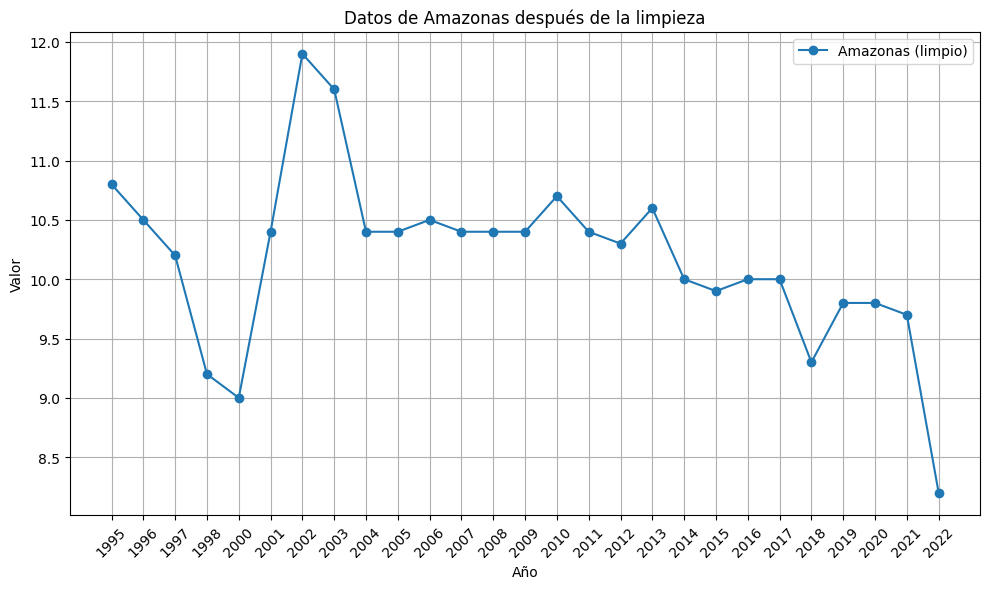

✅ Dataset limpio guardado en: /content/drive/MyDrive/Ant Team/Datasets/Temperaturas_peru_limpio.csv

Primeras filas del dataset limpio:
  Departamento  1995  1996  1997  1998  2000  2001  2002  2003  2004  ...  \
0     Amazonas  10.8  10.5  10.2   9.2   9.0  10.4  11.9  11.6  10.4  ...   
2     Apurímac  10.0  10.0  10.1  10.8   9.9  10.1  10.3  11.5  10.2  ...   
3     Arequipa   9.4   9.2   9.9  10.3   9.1   9.7  10.0  11.2   9.4  ...   
4     Ayacucho   4.1   6.7   5.6   5.9   5.9   5.9   7.4   7.8   8.2  ...   
5    Cajamarca   8.8   7.6   8.3   8.3   7.2   8.1   8.3   8.1   7.9  ...   

   2013  2014  2015  2016  2017  2018  2019  2020  2021  2022  
0  10.6  10.0   9.9  10.0  10.0   9.3   9.8  9.80   9.7   8.2  
2   7.8   7.3   6.0   6.7   8.3   8.2   8.9  9.00   9.1   9.0  
3   8.0   8.5  10.1   9.8   9.8   9.8  10.1  9.85   9.6   9.0  
4  10.8  10.1  10.6  10.7  10.1   7.9   7.3  8.40   7.8   6.8  
5   8.2   8.4   8.9   8.3   8.5   8.3   8.9  8.60   8.2   8.2  

[5 rows x 28 col

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === Cargar dataset ===
# Especificar valores que representan datos faltantes al cargar
try:
    df = pd.read_csv(
        '/content/drive/MyDrive/Ant Team/Datasets/minAnual_1995_2022.csv',
        sep=None,
        engine='python',
        na_values=['a/', '...', '…', '-', '']
    )
    print("✅ Dataset cargado correctamente.")
except FileNotFoundError:
    print("❌ Error: No se encontró el archivo. Verifica la ruta.")
    exit()
except Exception as e:
    print(f"❌ Error al cargar el archivo: {e}")
    exit()

# Mostrar información inicial
print("\nColumnas detectadas:", df.columns.tolist())
print("\nPrimeras filas del dataset original:")
print(df.head())

# === 2Renombrar la primera columna como 'Departamento' ===
# Verificar si la primera columna ya se llama 'Departamento' para evitar errores
if df.columns[0] != 'Departamento':
    df.rename(columns={df.columns[0]: 'Departamento'}, inplace=True)
    print("✅ Primera columna renombrada como 'Departamento'.")
else:
    print("La primera columna ya se llama 'Departamento'.")

# === Verificar y manejar valores faltantes ===
# Confirmar valores faltantes antes de la limpieza
print("\nValores faltantes por columna antes de la limpieza:")
print(df.isna().sum())

# === Convertir columnas de años a float ===
cols_years = df.columns[1:]  # Todas las columnas excepto 'Departamento'
for col in cols_years:
    df[col] = pd.to_numeric(df[col], errors='coerce')
print("Columnas de años convertidas a float.")

# === Imputación de valores faltantes ===
# Interpolación lineal por fila (manteniendo tu enfoque)
df[cols_years] = df[cols_years].interpolate(method='linear', axis=1, limit_direction='both')

# Rellenar valores faltantes restantes (por ejemplo, al inicio o final de la serie)
# Usar la mediana por fila para evitar sesgos de valores extremos
df[cols_years] = df[cols_years].apply(
    lambda row: row.fillna(row.median()), axis=1
)

# Verificar valores faltantes después de la imputación
print("\nValores faltantes por columna después de la limpieza:")
print(df.isna().sum())

# === Ordenar por departamento alfabéticamente ===
df.sort_values(by='Departamento', inplace=True)
print("✅ Dataset ordenado por 'Departamento'.")

# === 7️⃣ Validación: Visualización de un departamento ===
# Graficar datos de un departamento (ejemplo: Amazonas) para validar la limpieza
plt.figure(figsize=(10, 6))
plt.plot(cols_years, df[df['Departamento'] == 'Amazonas'].iloc[0, 1:], marker='o', label='Amazonas (limpio)')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.title('Datos de Amazonas después de la limpieza')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 8️⃣ Exportar dataset limpio ===
output_path = '/content/drive/MyDrive/Ant Team/Datasets/Temperaturas_peru_limpio.csv'
try:
    df.to_csv(output_path, index=False)
    print(f"✅ Dataset limpio guardado en: {output_path}")
except Exception as e:
    print(f"❌ Error al guardar el archivo: {e}")

# Mostrar primeras filas del dataset limpio
print("\nPrimeras filas del dataset limpio:")
print(df.head())


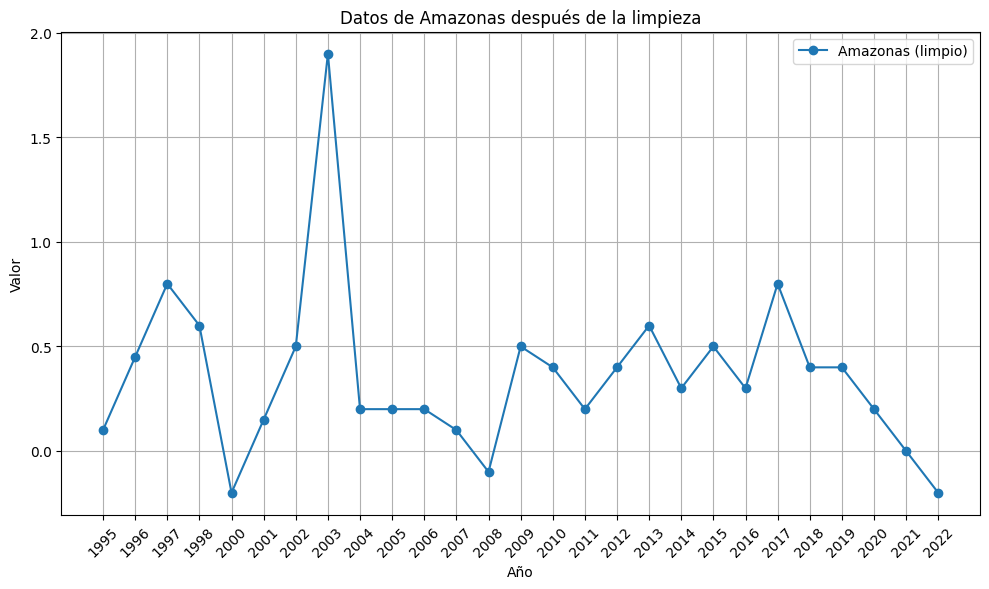

In [ ]:
# === 7️⃣ Validación: Visualización de un departamento ===
# Graficar datos de un departamento (ejemplo: Amazonas) para validar la limpieza
plt.figure(figsize=(10, 6))
plt.plot(cols_years, df[df['Departamento'] == 'Pasco'].iloc[0, 1:], marker='o', label='Amazonas (limpio)')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.title('Datos de Amazonas después de la limpieza')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 1.2 Dataset Vacunación

aqui se hizo el tratamiento del dataset por provincia

### Paso 01
se investigo cuales vacunas del dataset estan relacionadas directamente con la prevención  de las iras

- BCG: Previene formas graves de tuberculosis, incluida la pulmonar, una infección respiratoria importante en la infancia [1].

- DPT: Protege contra difteria, tétanos y tos ferina, esta última una causa frecuente de infecciones respiratorias agudas [2].

- Tdap: Refuerza la inmunidad frente a la tos ferina, reduciendo brotes respiratorios en adolescentes y adultos [3].

- PENTA: Incluye protección contra tos ferina y Haemophilus influenzae tipo b, ambas relacionadas con IRAS [4].

- NEUMO: Previene neumonía y otras infecciones respiratorias causadas por Streptococcus pneumoniae [5].

- INFLUENZA: Disminuye casos de gripe y complicaciones respiratorias como la neumonía [6].

- SPR: Previene el sarampión, que puede generar neumonía como complicación respiratoria grave [7].

<br>
<br>

1. World Health Organization, “Bacille Calmette-Guérin (BCG) vaccination,” WHO, 2023.  
2. World Health Organization, “Pertussis vaccines: WHO position paper,” 2021.  
3. Centers for Disease Control and Prevention, “Tdap Vaccine,” 2024.  
4. Ministerio de Salud del Perú, “Esquema Nacional de Vacunación,” 2024.  
5. Organización Panamericana de la Salud, “Vacuna antineumocócica,” 2023.  
6. American Lung Association, “Vaccines for respiratory infections,” 2024.  
7. World Health Organization, “Measles vaccines: WHO position paper,” 2020.

In [ ]:
import pandas as pd

# Cargar CSV
# Specify the semicolon as the separator
df = pd.read_csv("/content/drive/MyDrive/Ant Team/Datasets/Trama_esquema_regular_vacunacion2020_2025.csv", sep=';')
print(df.columns)

# Convertir todo a mayúsculas para uniformizar
df["diresa"] = df["diresa"].str.upper()
df["vacuna"] = df["vacuna"].str.upper()

# === 2. Filtrar solo vacunas respiratorias (IRAs) ===
vacunas_ira = ["BCG", "DPT", "TDAP", "NEUMO", "INFLUENZA", "SPR"]
df = df[df["vacuna"].apply(lambda x: any(v in x for v in vacunas_ira))]

# === 3. Marcar las DIRIS de Lima como 'LIMA' ===
df["diresa"] = df["diresa"].replace({
    "LIMA DIRIS CENTRO": "LIMA",
    "LIMA DIRIS ESTE": "LIMA",
    "LIMA DIRIS NORTE": "LIMA",
    "LIMA DIRIS SUR": "LIMA",
    "LIMA PROVINCIAS": "LIMA"
})

# === 4. Agrupar correctamente por departamento, vacuna y año ===
# Suma solo si la vacuna y el año son iguales
df_grouped = (
    df.groupby(["diresa", "vacuna", "anio"], as_index=False)
    .agg({
        "cantidad": "sum",
        "poblacion": "sum"
    })
)
# Ordenar por departamento y año
df = df.sort_values(by=["diresa", "anio"])

# Ordenar por departamento (diresa) y año
df_grouped = df_grouped.sort_values(by=["diresa", "anio", "vacuna"])

# === 7️⃣ Exportar el resultado ===
salida = "/content/drive/MyDrive/Ant Team/Datasets/vacunacion_ira_limpio.csv"
df_grouped.to_csv(salida, index=False, encoding='utf-8-sig')

print("✅ Dataset limpio guardado en:", salida)
print(df_limpio.head(10))

Index(['diresa', 'vacuna', 'anio', 'cantidad', 'poblacion'], dtype='object')
✅ Dataset limpio guardado en: /content/drive/MyDrive/Ant Team/Datasets/vacunacion_ira_limpio.csv
        diresa                  vacuna  anio  cantidad  poblacion
166   AMAZONAS  INFLUENZA ADULTO MAYOR  2020     18635      17608
223   AMAZONAS          NEUMO 1° DOSIS  2020      7954       9163
778   AMAZONAS      INFLUENZA 2° DOSIS  2020      4372       4599
1280  AMAZONAS         DPT 2° REFUERZO  2020      6699      10006
2400  AMAZONAS          NEUMO 3° DOSIS  2020      7560      10146
3599  AMAZONAS      INFLUENZA 1° DOSIS  2020      6055       4599
3715  AMAZONAS      NEUMO ADULTO MAYOR  2020     11344      10551
4520  AMAZONAS          NEUMO 2° DOSIS  2020      7603       9163
4631  AMAZONAS         DPT 1° REFUERZO  2020      6849      10146
371   AMAZONAS          NEUMO 1° DOSIS  2021      8215       9163


## 1.3 Dataset Poblacion Estimada

aqui se hizo el tratamiento del dataset de poblacion estiamda por provincia y años

In [ ]:
# ===============================================================
# 🔹 COMBINADOR DE CSVs (2005–2023) DESDE CARPETA COMPARTIDA EN DRIVE
# ===============================================================

from google.colab import auth, drive
auth.authenticate_user()  # 🔐 Autenticación automática (sin client_secrets.json)
drive.mount('/content/drive', force_remount=True)

!pip install -q --upgrade pydrive2

from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
import pandas as pd
import os, re, glob

# ---------------------------------------------------------------
# 1️⃣ Autenticación con PyDrive2 usando tokens integrados de Colab
# ---------------------------------------------------------------
gauth = GoogleAuth()
gauth.LoadCredentialsFile("/content/drive/MyDrive/pydrive2creds.json")

if gauth.credentials is None:
    gauth.LocalWebserverAuth()
elif gauth.access_token_expired:
    gauth.Refresh()
else:
    gauth.Authorize()

gauth.SaveCredentialsFile("/content/drive/MyDrive/pydrive2creds.json")

drive_service = GoogleDrive(gauth)

# ---------------------------------------------------------------
# 2️⃣ ID de la carpeta compartida (de tu enlace)
# ---------------------------------------------------------------
folder_id = "18AhHvb41nwcGVOqSEWbT-HNqBrOh3Nkh"

# ---------------------------------------------------------------
# 3️⃣ Descargar todos los CSV de la carpeta compartida
# ---------------------------------------------------------------
os.makedirs("/content/temp_csv", exist_ok=True)

file_list = drive_service.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()

if not file_list:
    print("⚠️ No se encontraron archivos en la carpeta compartida.")
else:
    print(f"🔍 Archivos encontrados en la carpeta compartida ({len(file_list)}):")
    for f in file_list:
        print(f"📄 {f['title']}")

    # Descargar solo los CSV
    for f in file_list:
        if f['title'].endswith(".csv"):
            print(f"⬇️ Descargando {f['title']} ...")
            f.GetContentFile(f"/content/temp_csv/{f['title']}")

    print("\n✅ Todos los CSV descargados en /content/temp_csv/")

# ---------------------------------------------------------------
# 4️⃣ Unificar y limpiar todos los CSV descargados
# ---------------------------------------------------------------
ruta = "/content/temp_csv/*.csv"
archivos = sorted(glob.glob(ruta))

print(f"\n🔍 Se encontraron {len(archivos)} archivos CSV para procesar.")

lista_df = []

for archivo in archivos:
    nombre = os.path.basename(archivo)
    año_encontrado = re.search(r'\d{4}', nombre)
    año = int(año_encontrado.group()) if año_encontrado else None

    print(f"\n📂 Procesando {nombre} (Año detectado: {año})...")

    df = None
    for sep in [',', ';', '\t']:
        for enc in ['utf-8', 'latin1']:
            try:
                df = pd.read_csv(
                    archivo,
                    sep=sep,
                    encoding=enc,
                    on_bad_lines='skip',
                    low_memory=False
                )
                break
            except Exception:
                continue
        if df is not None:
            break

    if df is None:
        print(f"❌ No se pudo leer el archivo {nombre}. Se omite.")
        continue

    df["Año"] = año
    df.columns = df.columns.str.strip()
    lista_df.append(df)
    print(f"✅ {nombre} leído correctamente. Filas: {len(df)}, Columnas: {len(df.columns)}")

# ---------------------------------------------------------------
# 5️⃣ Combinar todos los DataFrames y guardar en Drive
# ---------------------------------------------------------------
if not lista_df:
    print("\n⚠️ No se pudo leer ningún archivo. Revisa tus CSV.")
else:
    df_final = pd.concat(lista_df, ignore_index=True, sort=False)
    print(f"\n📊 Archivos combinados: {len(lista_df)} | Total filas: {len(df_final)}")

    # Crear carpeta de salida si no existe
    os.makedirs("/content/drive/MyDrive/Ant Team/Datasets", exist_ok=True)
    salida = "/content/drive/MyDrive/Ant Team/Datasets/Dataset_Centralizado.csv"

    df_final.to_csv(salida, index=False, encoding='utf-8-sig')
    print(f"💾 Dataset final guardado en: {salida}")

    # Mostrar las primeras filas
    display(df_final.head())


In [ ]:
!ls "/content/drive/MyDrive/"


'16 Práctica Tablas Dinámicas I.xlsx'
'4.- Formato Fuente  - Párrafo.docx'
'5.- Superíndice_Subíndice_Letra Capital.docx'
 ACTUALIZACIONES
'Aguinaldo 2019.pdf'
 AUD-20220114-WA0000.mp3
 B312-00051382.pdf
 clideo.com
'DNI de Willy Alexander Huisa Perez.jpg'
'Documento sin título (1).gdoc'
'Documento sin título.docx'
'Documento sin título.gdoc'
'EXCEL INTERMEDIO'
'https:  vm.tikt.txt'
 MyBoy
 pluralsingular.gdoc
'Pokémon Glazed+.SAV'
'Práctica consolidadar en varias hojas.xlsx'
'Práctica consolidar.xlsx'
'Practica Formato condiconal.xlsx'
'PRACTICA FORMATO DE INFORMES (1).xlsx'
'PRACTICA FORMATO DE INFORMES.xlsx'
'Practica General Excel Intermedio.xlsx'
'practica solver.xlsx'
'Practica Validaciones.xlsx'
'Primera Evaluación Excel Intermedio.xlsx'
'SISTEMA EXCRETOR - IMAGEN (1).gdoc'
'SISTEMA EXCRETOR - IMAGEN.gdoc'
'Tarea Capítulo 1 Todo está conectado.pdf'
'Teoria Formato Condicional.xlsx'
'Teoria Informe de Tablas Dinámicas.xlsx'
'Teoria Validacion de Datos.xlsx'
'WORD B